In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
path = os.path.join('sim_data', 'mistrust_sim_data.csv')
df = pd.read_csv(path)
df.head()

,n_agents,true_p,layout,mistrust,result,rounds
0,6,0.55,connected,1.00,true_consensus,14
1,6,0.55,connected,1.25,polarization,17
2,6,0.55,connected,1.50,true_consensus,9
3,6,0.55,connected,2.00,polarization,3
4,6,0.55,connected,2.50,polarization,6


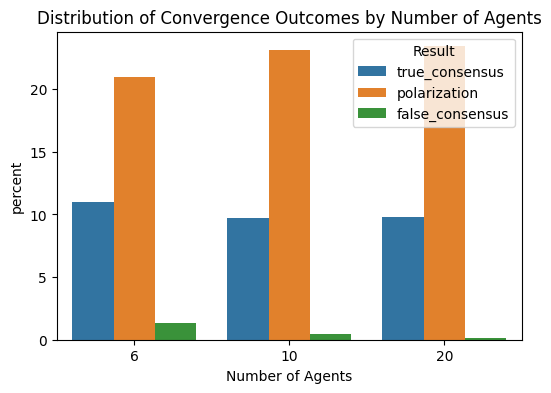

In [3]:
plt.figure(figsize=(6, 4))
sns.countplot(x='n_agents', hue='result', data=df, stat='percent')
plt.title('Distribution of Convergence Outcomes by Number of Agents')
plt.xlabel('Number of Agents')
plt.legend(title='Result')
plt.show()

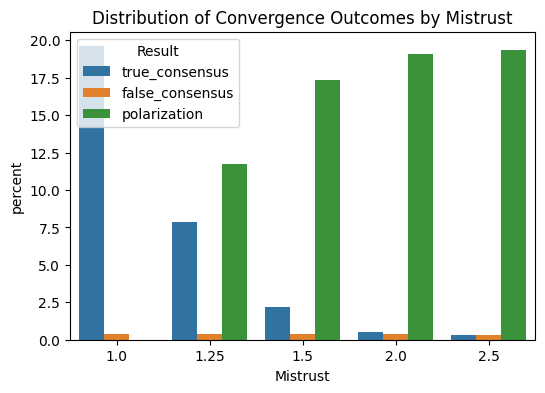

In [4]:
plt.figure(figsize=(6, 4))
sns.countplot(x='mistrust', hue='result', data=df, stat='percent')
plt.title('Distribution of Convergence Outcomes by Mistrust')
plt.xlabel('Mistrust')
plt.legend(title='Result')
plt.show()

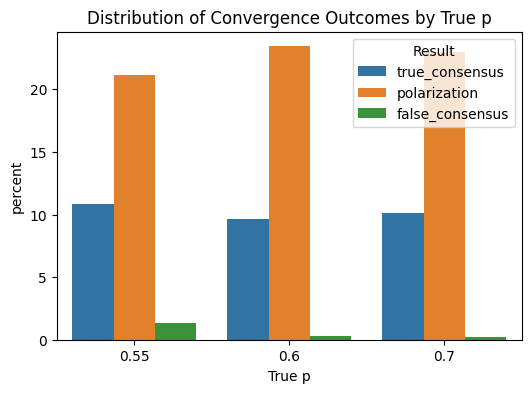

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(x='true_p', hue='result', data=df, stat='percent')
plt.title('Distribution of Convergence Outcomes by True p')
plt.xlabel('True p')
plt.legend(title='Result')
plt.show()

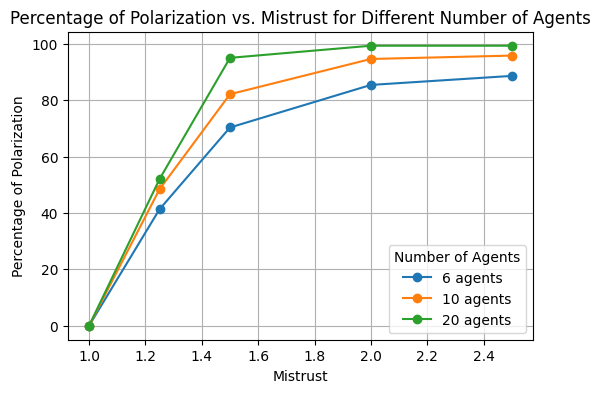

In [6]:
grouped = df.query('true_p == 0.55').groupby(['n_agents', 'mistrust']).result.value_counts(normalize=True).unstack().fillna(0)
polarization_percent = grouped.xs('polarization', axis=1, drop_level=True) * 100

# Plotting
plt.figure(figsize=(6, 4))

for n_agents in polarization_percent.index.levels[0]:
    plt.plot(polarization_percent.loc[n_agents].index, polarization_percent.loc[n_agents].values, marker='o', label=f'{n_agents} agents')

plt.xlabel('Mistrust')
plt.ylabel('Percentage of Polarization')
plt.title('Percentage of Polarization vs. Mistrust for Different Number of Agents')
plt.legend(title='Number of Agents')
plt.grid(True)
plt.show()